In [5]:
# We need to handle fonts without glyf key, because we have about 10_000 of them and cannot throw them away.
# We will load the log file of the filter in a dataframe and check the fonts without glyf key.
import pandas as pd
import os
import numpy as np

path_logs = "../data/collection"
# names of log files look like this: log_filter_fonts*.txt
log_files = [f for f in os.listdir(path_logs) if f.startswith("log_filter_fonts")]
log_files

['log_filter_fonts1.txt',
 'log_filter_fonts2.txt',
 'log_filter_fonts3.txt',
 'log_filter_fonts0.txt']

In [32]:
df = pd.DataFrame()
for log_file in log_files:
    df_new = pd.read_csv(os.path.join(path_logs, log_file), sep=",", header=None, on_bad_lines='skip')
    # Get rid of all rows that have NaN in the colomn 2.
    df_new = df_new[df_new[2].notna()]
    df_new = df_new.fillna('')
    # drop the first column
    df_new = df_new.drop(columns=[0])
    df = pd.concat([df, df_new], ignore_index=True)
    # reset index
    df = df.reset_index(drop=True)
df.fillna('', inplace=True)
df.tail()

,1,2,3
57955,bookmanlightcondensed.ttf,INCLUDED,
57956,mummy_regular_ttnorm.ttf,INCLUDED,
57957,serifatlig.ttf,INCLUDED,
57958,claytoncondensed_normal.ttf,INCLUDED,
57959,Kirsty_Regular.ttf,INCLUDED,


In [33]:
df[3].str.contains("has_no_glyf")

0        False
1        False
2        False
3         True
4         True
         ...  
57955    False
57956    False
57957    False
57958    False
57959    False
Name: 3, Length: 57960, dtype: bool

In [35]:
# df with only the fonts without glyf key
df_without_glyf = df[df[3].str.contains("has_no_glyf")]
df_without_glyf = df_without_glyf.reset_index(drop=True)
df_without_glyf.tail()

,1,2,3
20522,Cheese Donuts.otf,EXCLUDED,has_no_glyf
20523,Andina_Regular.otf,EXCLUDED,has_no_glyf
20524,EppsEvans-Black.otf,EXCLUDED,has_no_glyf
20525,Strawhouse.otf,EXCLUDED,has_no_glyf
20526,Ornament-Wood.otf,EXCLUDED,has_no_glyf


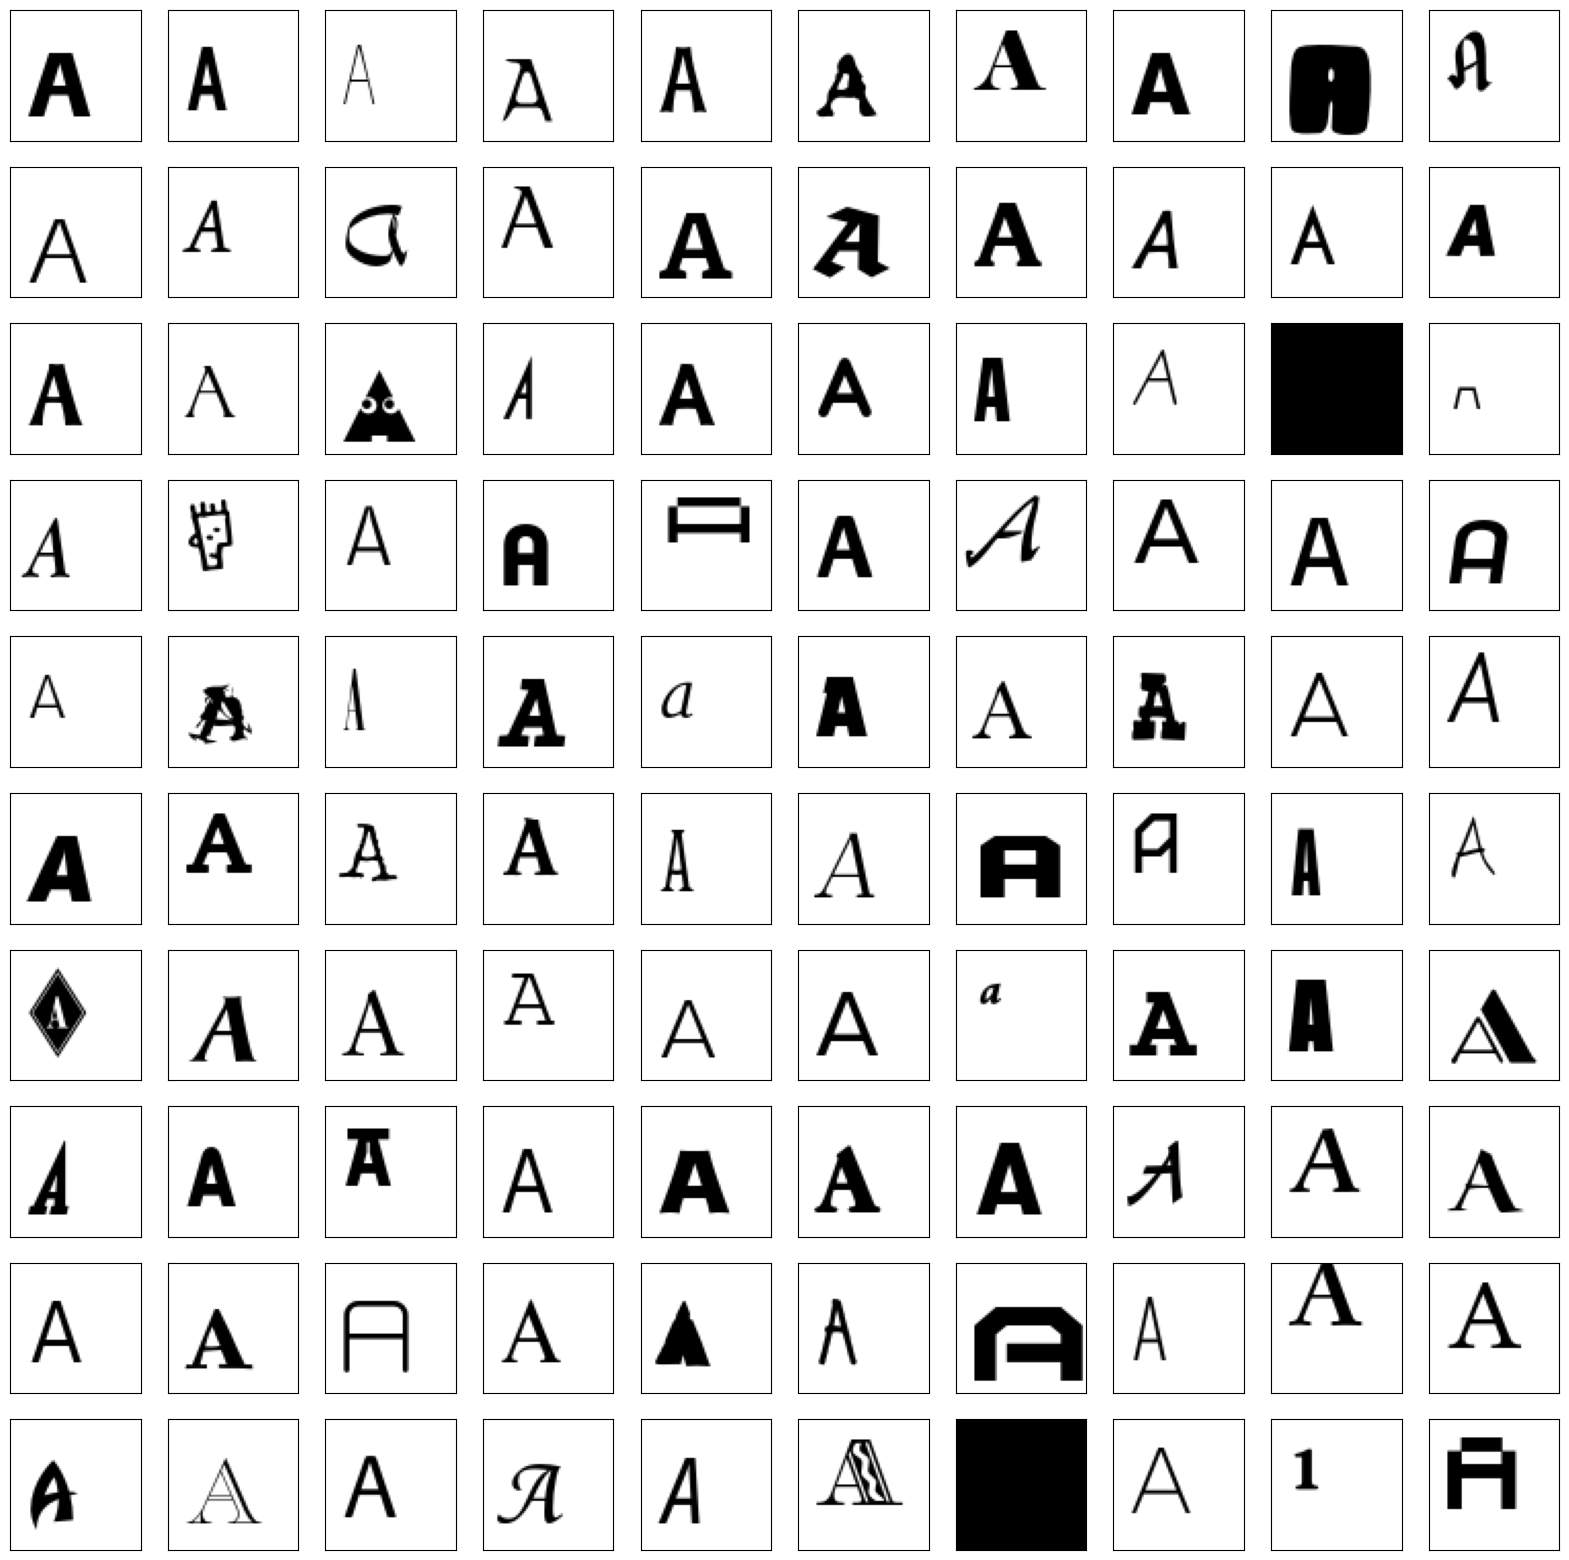

In [45]:
# let's render one of the fonts without glyf key
import sys
sys.path.append('../')

from src.data import datarenderer
from fontTools.ttLib import TTFont

file_path = path_logs
file_names = df_without_glyf[1][:]
datarenderer.plot_glyphs([os.path.join(file_path, file_name) for file_name in file_names[:100]], chars="A")

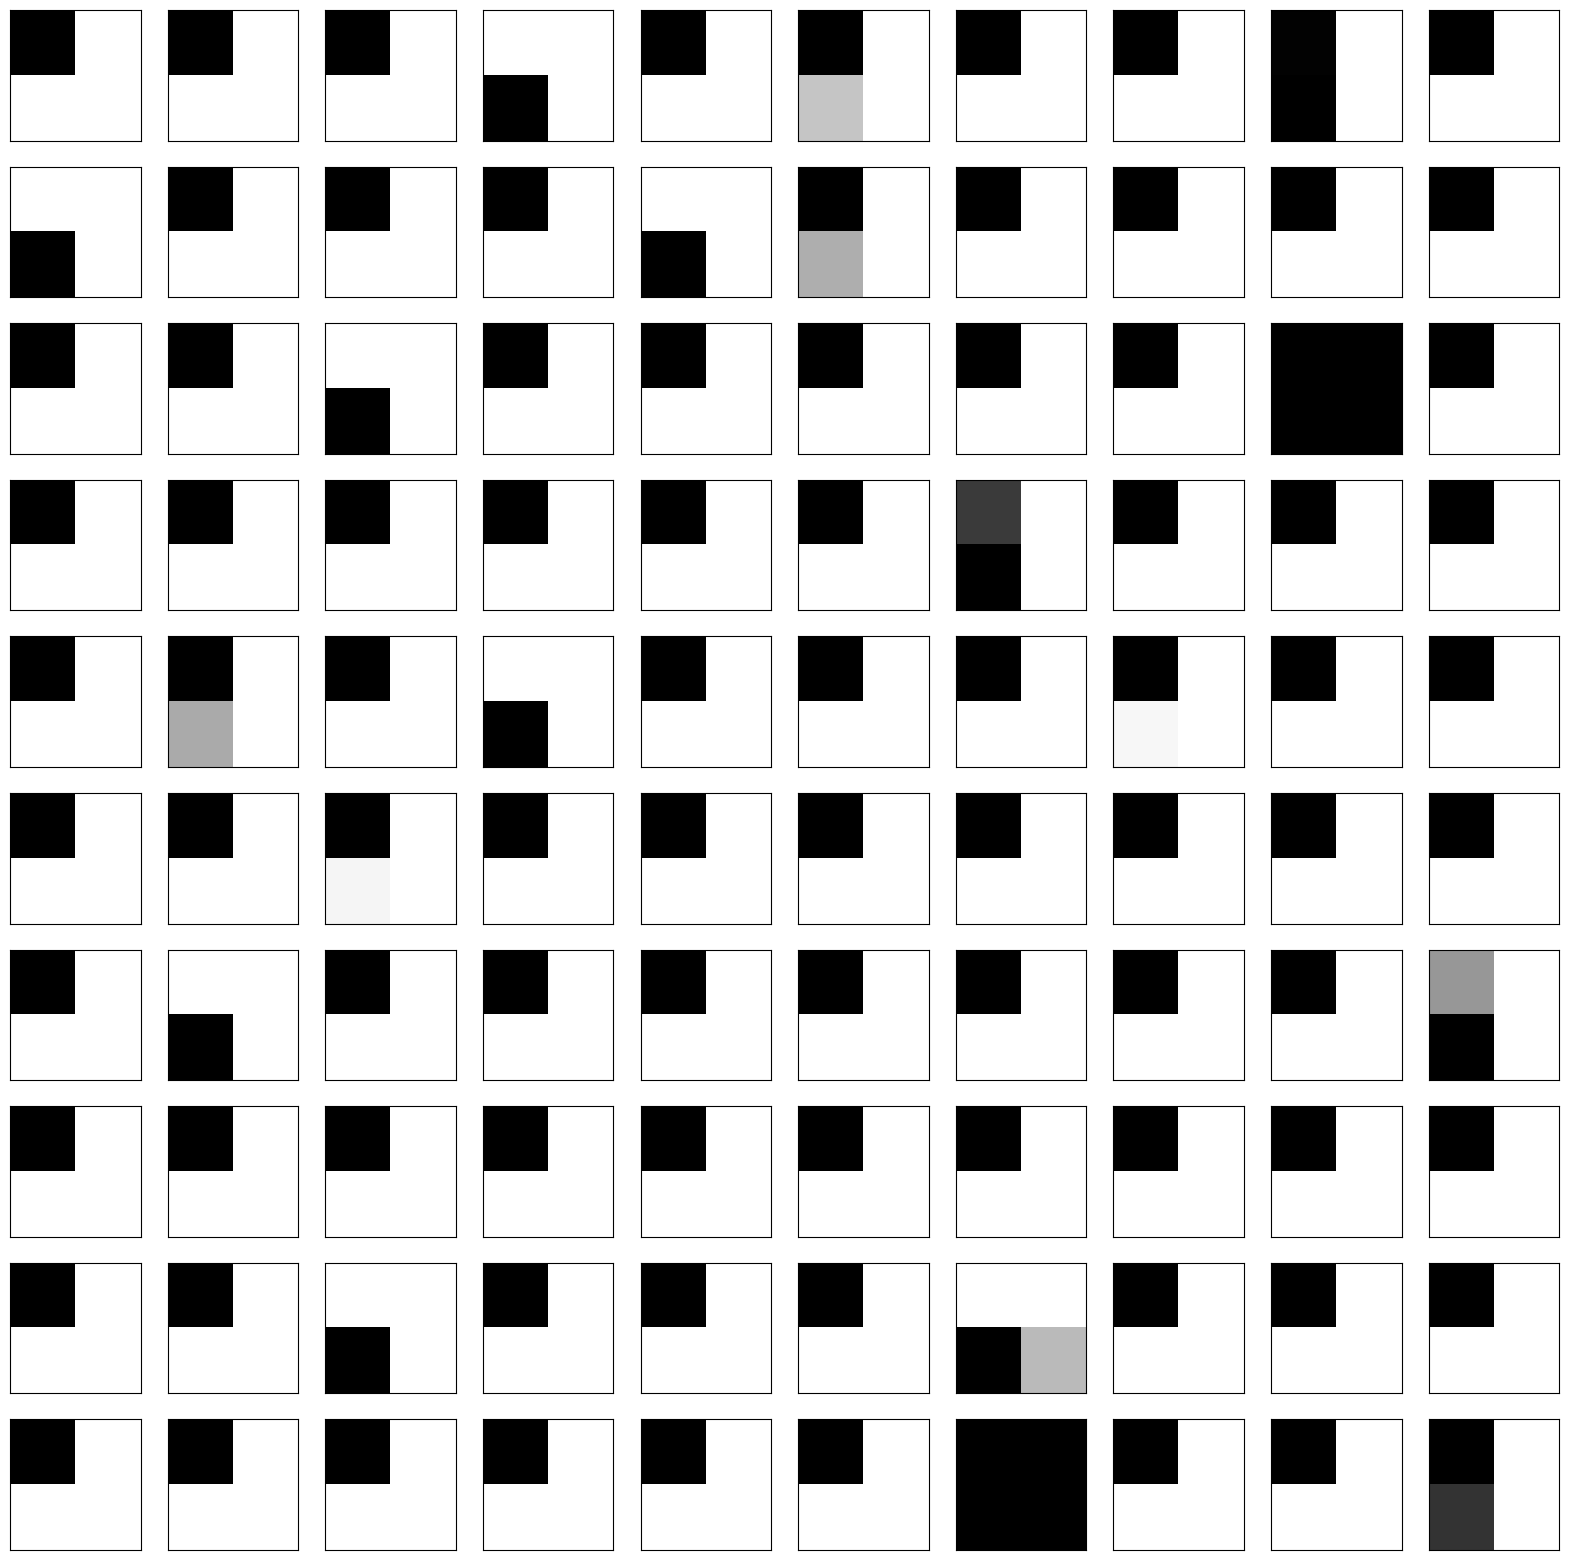

In [54]:
datarenderer.plot_glyphs([os.path.join(file_path, file_name) for file_name in file_names[:100]], chars="A", size=2)

In [46]:
font = TTFont(os.path.join(file_path, file_names[0]))

In [47]:
font.keys()

['GlyphOrder',
 'head',
 'hhea',
 'maxp',
 'OS/2',
 'name',
 'cmap',
 'post',
 'CFF ',
 'GPOS',
 'hmtx']

In [51]:
# where is the glyph data if there is no key 'glyf'?
font['CFF '].cff.topDictIndex[0].CharStrings.charStrings.keys()

dict_keys(['.notdef', 'space', 'exclam', 'quotedbl', 'numbersign', 'dollar', 'percent', 'ampersand', 'quoteright', 'parenleft', 'parenright', 'asterisk', 'plus', 'comma', 'hyphen', 'period', 'slash', 'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'colon', 'semicolon', 'less', 'equal', 'greater', 'question', 'at', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'bracketleft', 'backslash', 'bracketright', 'asciicircum', 'underscore', 'quoteleft', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'braceleft', 'bar', 'braceright', 'asciitilde', 'exclamdown', 'sterling', 'fraction', 'section', 'currency', 'quotesingle', 'quotedblleft', 'guilsinglleft', 'guilsinglright', 'fi', 'fl', 'endash', 'dagger', 'periodcentered', 'paragraph', 'bullet', 'quotesinglbase', 'quotedblbase', 'quotedblright', 'ellips

In [84]:
# We can not check the glyph data for emptyness. But we can check the rendered image for emptyness.
# If the image is empty, the glyph data is empty.
chars = "A"
for file_name in file_names[:10000]:
    glyph_array = datarenderer.render_font(os.path.join(file_path, file_name), chars=chars, size=2, normalize=True)
    glyph_array = 1 - glyph_array
    #print(glyph_array)
    empty_entries = (np.sum(glyph_array, axis=(0, 1)) == 0)
    if np.any(empty_entries):
        print("There are empty glyphs in the font.")

There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in the font.
There are empty glyphs in th